# Seminar: Økonomisk og Social Ulighed
Oliver Nyrop Weeks / 20. December 2024

In [1]:
# Importer moduler
import numpy as np
import os
import agentpy as ap
import matplotlib.pyplot as plt

# Output-mappe
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

In [2]:
# Importer nødvendige moduler
from model import *

# Parametre med eksplicitte seeds fra 1 til 5
parameters = {
    'labor_force': 1000,
    'separation_rate': 0.015,
    'initial_wealth': 0,
    'steps': 70,
    'initial': 0.95,
    'target': 0.895,
    'rolling_initial_eligibility': False,
    'seed': ap.Values(1, 2, 3, 4, 5)  # Brug eksplicit seeds 1 til 5
}

# Opret et prøvesæt ved hjælp af alle angivne seeds
sample = ap.Sample(parameters)

# Eksperiment for modellen uden arbejdsløshedsforsikring (UI)
exp_no_ui = ap.Experiment(
    LaborMarketModel,
    sample,
    iterations=1,   # Én iteration pr. seed
    record=True,
    randomize=False   # Brug ikke yderligere tilfældighed
)
results_no_ui = exp_no_ui.run()

# Eksperiment for modellen med arbejdsløshedsforsikring (UI)
exp_ui = ap.Experiment(
    LaborMarketModelUI,
    sample,
    iterations=1,
    record=True,
    randomize=False
)
results_ui = exp_ui.run()

# Behandling af resultater for modellen uden UI
variables_no_ui = results_no_ui.arrange_variables()

# Grupper efter tid 't' og beregn gennemsnit over alle kørseler
avg_no_ui = variables_no_ui.groupby('t').mean()
unemployment_rate_no_ui_avg = avg_no_ui['unemployment_rate']
gini_no_ui_avg = avg_no_ui['gini_coefficient']

# Behandling af resultater for modellen med UI
variables_ui = results_ui.arrange_variables()

# Grupper efter tid 't' og beregn gennemsnit over alle kørseler
avg_ui = variables_ui.groupby('t').mean()
unemployment_rate_ui_avg = avg_ui['unemployment_rate']
gini_ui_avg = avg_ui['gini_coefficient']

Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.916790
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:14.256350


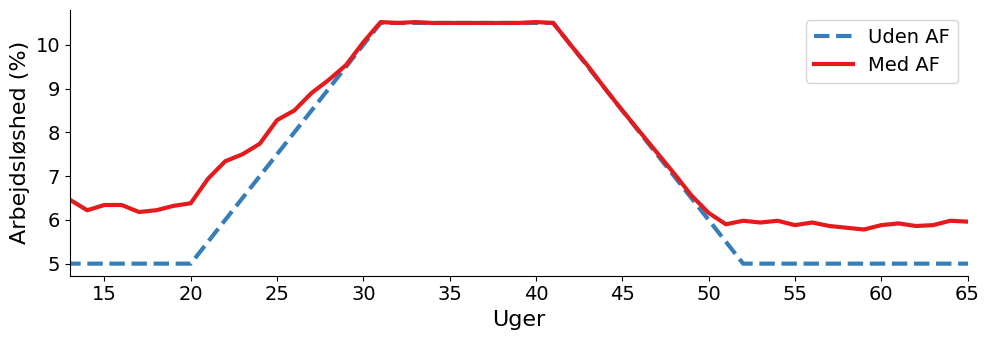

In [3]:
# Plot kun arbejdsløshedsraten
plt.figure(figsize=(10, 3.5))

# Udtræk de unikke tid fra de gennemsnitlige data
weeks = unemployment_rate_no_ui_avg.index

# Sørg for, at uger starter fra 1
weeks = weeks + 1  # Juster, hvis tid starter fra 0

# Sæt farver
colors = plt.get_cmap('Set1')

# Plot arbejdsløshedsrater
plt.plot(weeks, unemployment_rate_no_ui_avg.values, label='Uden AF', color=colors(1), linewidth=3, linestyle="--")
plt.plot(weeks, unemployment_rate_ui_avg.values, label='Med AF', color=colors(0), linewidth=3)

# Sæt etiketter for akserne
plt.xlabel('Uger', fontsize=16)
plt.ylabel('Arbejdsløshed (%)', fontsize=16)

# Sæt aksetiketter og grænser
x_ticks = [1] + list(range(5, parameters['steps'] + 1, 5))
plt.xticks(x_ticks, fontsize=14)
plt.xlim(13, 65)
plt.yticks(fontsize=14)
#plt.ylim(3, 14)  # Fjern kommentaren og juster, hvis nødvendigt

# Fjern øverste og højre kantlinjer
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Vis forklaring
plt.legend(fontsize=14)

# Juster layout for bedre placering
plt.tight_layout()

# Gem plottet som PDF
plot_path_pdf = os.path.join(output_folder, "baseline.pdf")
plt.savefig(plot_path_pdf)

# Vis plottet
plt.show()

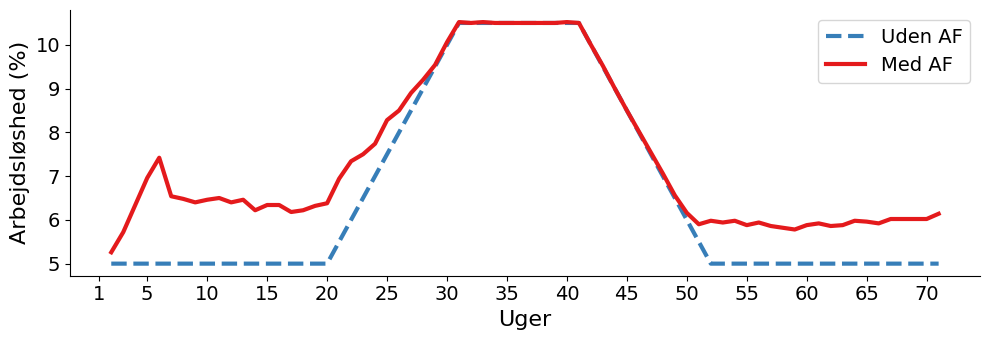

In [4]:
# Plot kun arbejdsløshedsraten
import os

plt.figure(figsize=(10, 3.5))

# Udtræk de unikke tid fra de gennemsnitlige data
weeks = unemployment_rate_no_ui_avg.index
weeks = weeks + 1  # Juster, hvis tid starter fra 0

# Sæt farver
colors = plt.get_cmap('Set1')

# Plot arbejdsløshedsrater
plt.plot(weeks, unemployment_rate_no_ui_avg.values, label='Uden AF', color=colors(1), linewidth=3, linestyle="--")
plt.plot(weeks, unemployment_rate_ui_avg.values, label='Med AF', color=colors(0), linewidth=3)

# Sæt etiketter for akserne
plt.xlabel('Uger', fontsize=16)
plt.ylabel('Arbejdsløshed (%)', fontsize=16)

# Sæt aksetiketter og grænser som angivet
x_ticks = [1] + list(range(5, parameters['steps'] + 1, 5))
plt.xticks(x_ticks, fontsize=14)
# Valgfrit: Fjern kommentaren og juster x-akse eller y-akse grænser, hvis nødvendigt
# plt.xlim(13, 65)   
plt.yticks(fontsize=14)
# plt.ylim(3, 14)   

# Fjern øverste og højre kantlinjer
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Vis forklaring
plt.legend(fontsize=14)

# Juster layout for bedre placering
plt.tight_layout()

# Gem plottet som PDF
plot_path_pdf = os.path.join(output_folder, "baseline2.pdf")
plt.savefig(plot_path_pdf)

# Vis plottet
plt.show()

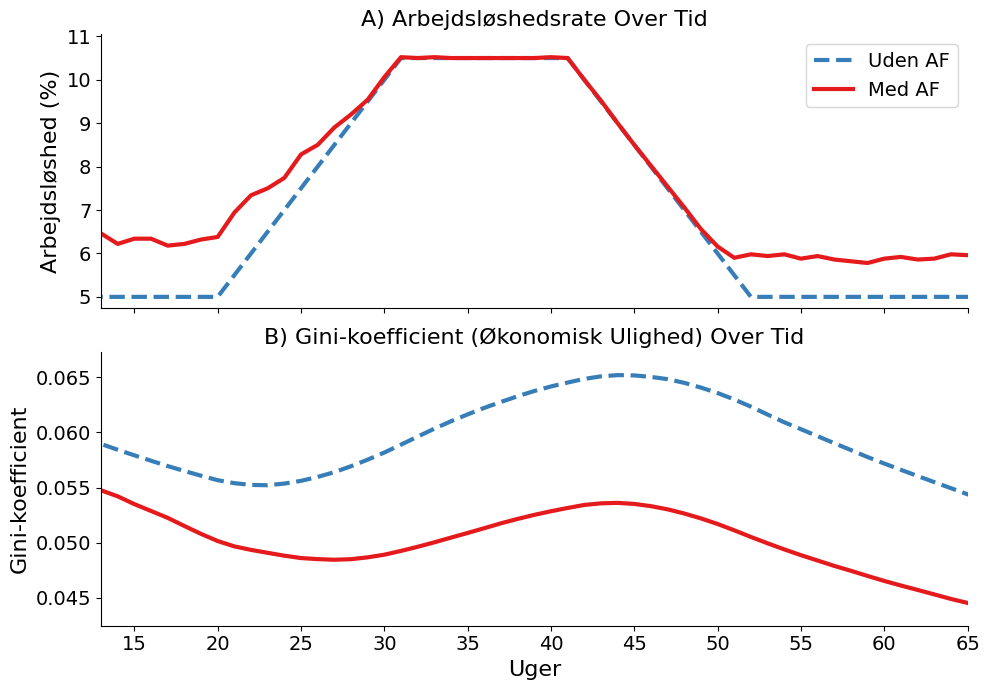

In [5]:
# Beregn Gini-koefficientgrænser inden for specificerede x-grænser
# Udtræk uger direkte fra de gennemsnitlige dataindeks
weeks = gini_no_ui_avg.index + 1  # Juster, hvis tid starter fra 0

# Definer x-grænser
x_limits = (13, 65)
mask = (weeks >= x_limits[0]) & (weeks <= x_limits[1])

# Bestem y-grænser for Gini-koefficienter inden for x-grænserne
gini_min = min(gini_no_ui_avg[mask].min(), gini_ui_avg[mask].min())
gini_max = max(gini_no_ui_avg[mask].max(), gini_ui_avg[mask].max())

# Tilføj en lille margin for bedre visualisering
y_margin = (gini_max - gini_min) * 0.1
gini_y_limits = (gini_min - y_margin, gini_max + y_margin)

# Plot resultaterne med to underplots som tidligere
plt.figure(figsize=(10, 7))

# Sæt farver
colors = plt.get_cmap('Set1')

# Første underplot: Arbejdsløshedsrater
ax1 = plt.subplot(2, 1, 1)
ax1.plot(weeks, unemployment_rate_no_ui_avg.values, label='Uden AF', color=colors(1), linewidth=3, linestyle="--")
ax1.plot(weeks, unemployment_rate_ui_avg.values, label='Med AF', color=colors(0), linewidth=3)
ax1.set_ylabel('Arbejdsløshed (%)', fontsize=16)

# Sæt aksetiketter og grænser
x_ticks = [1] + list(range(5, parameters['steps'] + 1, 5))
ax1.set_xticks(x_ticks)
ax1.set_xticklabels([''] * len(x_ticks))  # Fjern x-akse etiketter for det første underplot
ax1.set_xlim(x_limits)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_title('A) Arbejdsløshedsrate Over Tid', fontsize=16)
ax1.legend(fontsize=14)

# Fjern øverste og højre kantlinjer
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Sæt y-grænser for arbejdsløshedsraten baseret på data inden for x-grænserne
ax1.set_ylim(
    min(unemployment_rate_no_ui_avg[mask].min(), unemployment_rate_ui_avg[mask].min()) * 0.95,
    max(unemployment_rate_no_ui_avg[mask].max(), unemployment_rate_ui_avg[mask].max()) * 1.05
)

# Andet underplot: Gini-koefficienter
ax2 = plt.subplot(2, 1, 2)
ax2.plot(weeks, gini_no_ui_avg.values, label='Uden AF', color=colors(1), linewidth=3, linestyle="--")
ax2.plot(weeks, gini_ui_avg.values, label='Med AF', color=colors(0), linewidth=3)
ax2.set_xlabel('Uger', fontsize=16)
ax2.set_ylabel('Gini-koefficient', fontsize=16)

# Sæt aksetiketter og grænser for x-aksen
ax2.set_xticks(x_ticks)
ax2.set_xlim(x_limits)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_title('B) Gini-koefficient (Økonomisk Ulighed) Over Tid', fontsize=16)

# Fjern øverste og højre kantlinjer
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Anvend de beregnede y-grænser for Gini-koefficienterne
ax2.set_ylim(gini_y_limits)

# Juster layout for bedre placering
plt.tight_layout()

# Gem plottet som PDF
plot_path_pdf = os.path.join(output_folder, "income1.pdf")
plt.savefig(plot_path_pdf)

# Vis plottet
plt.show()

Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.885660
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:18.398999


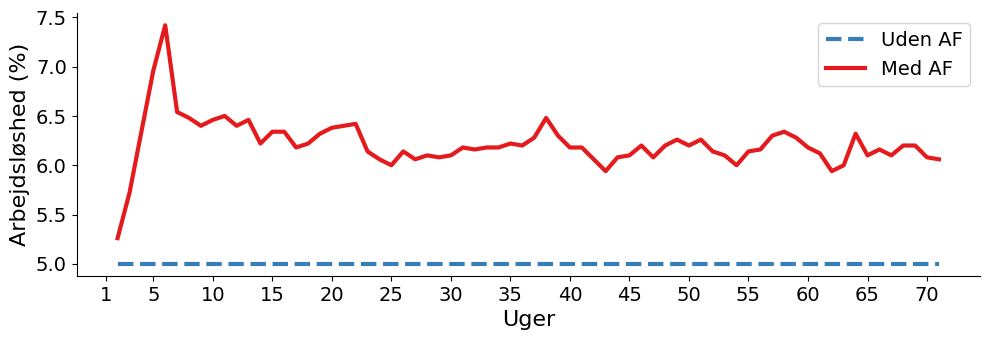

In [6]:
# Importér nødvendige moduler
from model import *

# Parametre med eksplicitte seeds fra 1 til 5
parameters = {
    'labor_force': 1000,
    'separation_rate': 0.015,
    'steps': 70,
    'initial': 0.95,
    'target': 0.95,
    'seed': ap.Values(1, 2, 3, 4, 5)  # Brug eksplicit seeds fra 1 til 5
}

# Opret et sample ved at bruge alle specificerede seeds
sample = ap.Sample(parameters)

# Eksperiment for modellen uden arbejdsløshedsforsikring (AF)
exp_no_ui = ap.Experiment(
    LaborMarketModel,
    sample,
    iterations=1,   # En iteration per seed
    record=True,
    randomize=False   # Undgå yderligere tilfældiggørelse af seeds
)
results_no_ui = exp_no_ui.run()

# Eksperiment for modellen med AF
exp_ui = ap.Experiment(
    LaborMarketModelUI,
    sample,
    iterations=1,
    record=True,
    randomize=False
)
results_ui = exp_ui.run()

# Behandl resultaterne for modellen uden AF
variables_no_ui = results_no_ui.arrange_variables()

# Gruppér efter tid 't' og beregn gennemsnittet over alle runs
avg_no_ui = variables_no_ui.groupby('t').mean()
unemployment_rate_no_ui_avg = avg_no_ui['unemployment_rate']
gini_no_ui_avg = avg_no_ui['gini_coefficient']

# Behandl resultaterne for modellen med AF
variables_ui = results_ui.arrange_variables()

# Gruppér efter tid 't' og beregn gennemsnittet over alle runs
avg_ui = variables_ui.groupby('t').mean()
unemployment_rate_ui_avg = avg_ui['unemployment_rate']
gini_ui_avg = avg_ui['gini_coefficient']

# Plot kun arbejdsløshedsraten
import os

plt.figure(figsize=(10, 3.5))

# Udtræk de unikke tid fra de gennemsnitlige data
weeks = unemployment_rate_no_ui_avg.index
weeks = weeks + 1  # Justér, hvis tid starter fra 0

# Sæt farver
colors = plt.get_cmap('Set1')

# Plot arbejdsløshedsraterne
plt.plot(weeks, unemployment_rate_no_ui_avg.values, label='Uden AF', color=colors(1), linewidth=3, linestyle="--")
plt.plot(weeks, unemployment_rate_ui_avg.values, label='Med AF', color=colors(0), linewidth=3)

# Sæt akseetiketter
plt.xlabel('Uger', fontsize=16)
plt.ylabel('Arbejdsløshed (%)', fontsize=16)

# Sæt akse-ticks og grænser som specificeret
x_ticks = [1] + list(range(5, parameters['steps'] + 1, 5))
plt.xticks(x_ticks, fontsize=14)
# Valgfrit: Fjern kommentar og justér aksegrænser, hvis nødvendigt
# plt.xlim(13, 65)   
plt.yticks(fontsize=14)
# plt.ylim(3, 14)   

# Fjern øverste og højre linjer
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Vis legenden
plt.legend(fontsize=14)

# Justér layout for bedre placering
plt.tight_layout()

# Gem plottet som PDF
plot_path_pdf = os.path.join(output_folder, "baseline3.pdf")
plt.savefig(plot_path_pdf)

# Vis plottet
plt.show()

In [7]:
# Importér nødvendige moduler
import agentpy as ap
import numpy as np
import matplotlib.pyplot as plt
import os

from model import *

# Definér de seeds, der skal bruges
seeds = [1, 2, 3, 4, 5]

# Definér parameterkombinationerne
parameter_combinations = [
    {'initial_wealth': 0, 'rolling_initial_eligibility': False},
    {'initial_wealth': 0, 'rolling_initial_eligibility': True},
    {'initial_wealth': 10, 'rolling_initial_eligibility': False},
    {'initial_wealth': 10, 'rolling_initial_eligibility': True},
]

# Titler og etiketter for hver parameterkombination
titles = [
    'A) Initialformue=0, Initial-berettigelse=Ikke-rullende',
    'B) Initialformue=0, Initial-berettigelse=Rullende',
    'C) Initialformue=10, Initial-berettigelse=Ikke-rullende',
    'D) Initialformue=10, Initial-berettigelse=Rullende'
]

# Initialiser lister til lagring af resultater for hver kombination
results_list = []

# Iterér over hver parameterkombination
for params in parameter_combinations:
    # Parametre med eksplicitte seeds
    parameters = {
        'labor_force': 1000,
        'separation_rate': 0.015,
        'steps': 70,
        'initial': 0.95,
        'target': 0.895,
        'initial_wealth': params['initial_wealth'],
        'rolling_initial_eligibility': params['rolling_initial_eligibility'],
        'seed': ap.Values(*seeds),  # Brug de specificerede seeds
    }

    # Opret et sample ved at bruge alle specificerede seeds
    sample = ap.Sample(parameters)

    # Eksperiment for modellen uden AF
    exp_no_ui = ap.Experiment(
        LaborMarketModel,
        sample,
        iterations=1,   # En iteration per seed
        record=True,
        randomize=False   # Undgå yderligere tilfældiggørelse af seeds
    )
    results_no_ui = exp_no_ui.run()

    # Eksperiment for modellen med AF
    exp_ui = ap.Experiment(
        LaborMarketModelUI,
        sample,
        iterations=1,
        record=True,
        randomize=False
    )
    results_ui = exp_ui.run()

    # Behandl resultaterne for modellen uden AF
    variables_no_ui = results_no_ui.arrange_variables()
    avg_no_ui = variables_no_ui.groupby('t').mean()
    unemployment_rate_no_ui_avg = avg_no_ui['unemployment_rate']
    gini_no_ui_avg = avg_no_ui['gini_coefficient']

    # Behandl resultaterne for modellen med AF
    variables_ui = results_ui.arrange_variables()
    avg_ui = variables_ui.groupby('t').mean()
    unemployment_rate_ui_avg = avg_ui['unemployment_rate']
    gini_ui_avg = avg_ui['gini_coefficient']

    # Gem de gennemsnitlige resultater
    results_list.append({
        'unemployment_rate_no_ui': unemployment_rate_no_ui_avg,
        'gini_no_ui': gini_no_ui_avg,
        'unemployment_rate_ui': unemployment_rate_ui_avg,
        'gini_ui': gini_ui_avg,
    })

Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.884520
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:14.457633
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.923628
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:11.430839
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.944303
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:14.254838
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.871673
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:11.582323


C:\Users\olive\AppData\Local\Temp\ipykernel_11216\4181059325.py:90: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


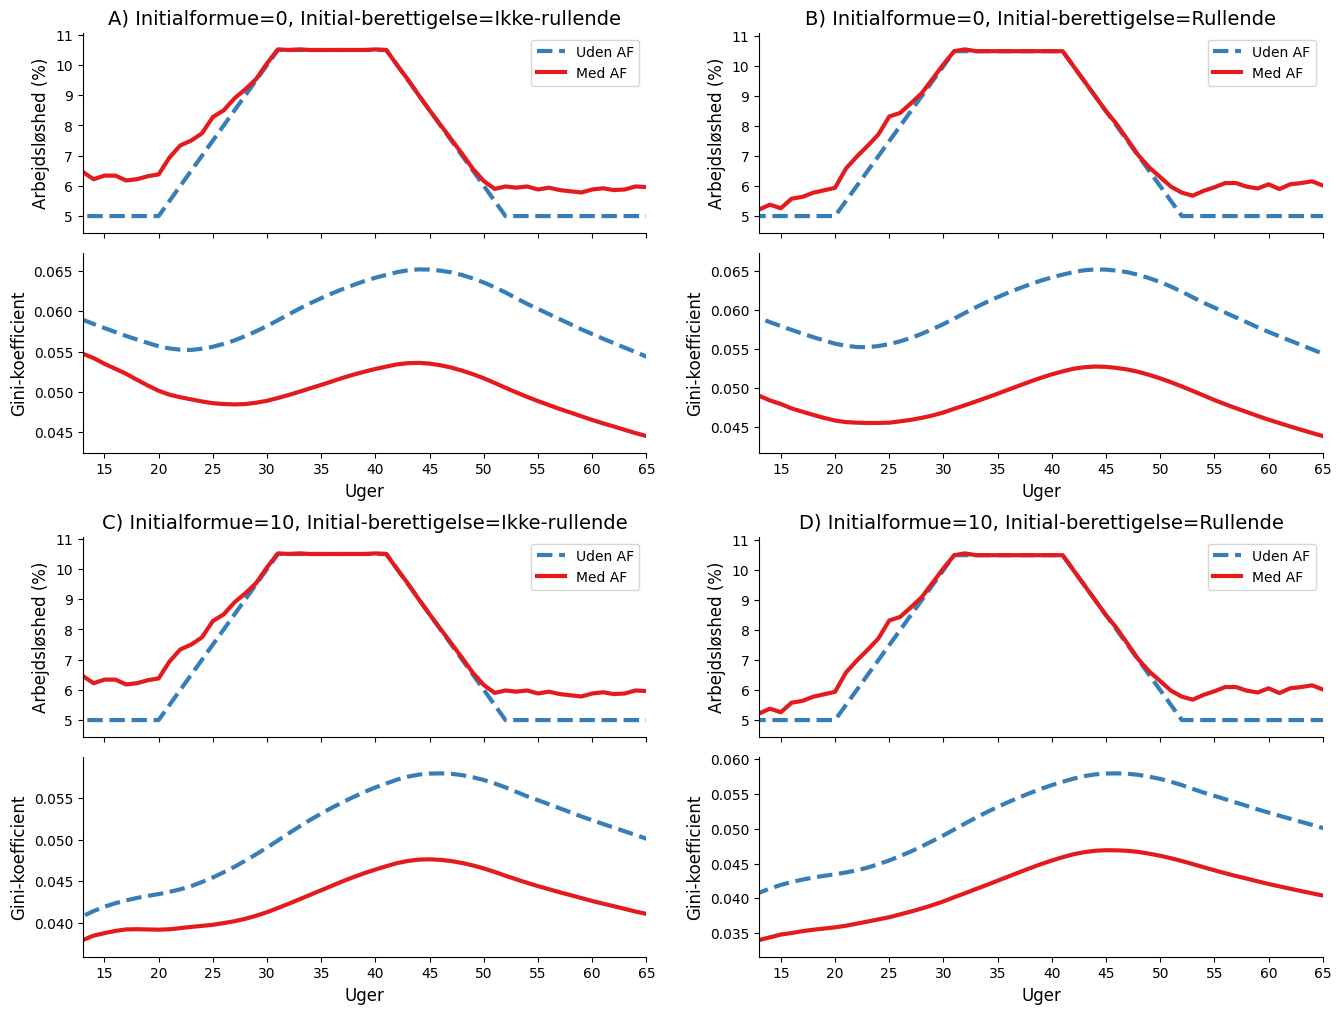

In [8]:
# Opret figuren med et 2x2 gitter, hvor hver celle har to underplots
import matplotlib.gridspec as gridspec

# Opret en figur
fig = plt.figure(figsize=(16, 12))

# Definer det ydre gitter
outer_grid = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)

# Indstil farver
colors = plt.get_cmap('Set1')

# Definer x-grænser og x-mærker
x_limits = (13, 65)
x_ticks = [1] + list(range(5, 71, 5))

# Gennemgå resultaterne og plot dem
for i, result in enumerate(results_list):
    # Find positionen i gitteret
    row = i // 2
    col = i % 2

    # Opret et indre gitter for hver celle
    inner_grid = gridspec.GridSpecFromSubplotSpec(
        2, 1,
        subplot_spec=outer_grid[i],
        height_ratios=[1, 1],
        hspace=0.1
    )

    unemployment_rate_no_ui_avg = result['unemployment_rate_no_ui']
    gini_no_ui_avg = result['gini_no_ui']
    unemployment_rate_ui_avg = result['unemployment_rate_ui']
    gini_ui_avg = result['gini_ui']

    weeks = unemployment_rate_no_ui_avg.index + 1  # Justér hvis tid starter fra 0

    # Opret masker for x-grænser
    mask = (weeks >= x_limits[0]) & (weeks <= x_limits[1])

    # Bestem y-grænser for arbejdsløshedsrate
    unemp_min = min(unemployment_rate_no_ui_avg[mask].min(), unemployment_rate_ui_avg[mask].min())
    unemp_max = max(unemployment_rate_no_ui_avg[mask].max(), unemployment_rate_ui_avg[mask].max())
    unemp_margin = (unemp_max - unemp_min) * 0.1
    unemp_y_limits = (unemp_min - unemp_margin, unemp_max + unemp_margin)

    # Bestem y-grænser for Gini-koefficienten
    gini_min = min(gini_no_ui_avg[mask].min(), gini_ui_avg[mask].min())
    gini_max = max(gini_no_ui_avg[mask].max(), gini_ui_avg[mask].max())
    gini_margin = (gini_max - gini_min) * 0.1
    gini_y_limits = (gini_min - gini_margin, gini_max + gini_margin)

    # Første underplot: Arbejdsløshedsrate
    ax1 = plt.Subplot(fig, inner_grid[0])
    ax1.plot(weeks, unemployment_rate_no_ui_avg.values, label='Uden AF', color=colors(1), linewidth=3, linestyle="--")
    ax1.plot(weeks, unemployment_rate_ui_avg.values, label='Med AF', color=colors(0), linewidth=3)
    ax1.set_ylabel('Arbejdsløshed (%)', fontsize=12)
    ax1.set_xticks(x_ticks)
    ax1.set_xticklabels([])  # Fjern x-akse-mærker for første underplot
    ax1.set_xlim(x_limits)
    ax1.tick_params(axis='both', which='major', labelsize=10)
    ax1.set_ylim(unemp_y_limits)
    ax1.legend(fontsize=10)
    ax1.set_title(f"{titles[i]}", fontsize=14)

    # Fjern øvre og højre kanter
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    fig.add_subplot(ax1)

    # Andet underplot: Gini-koefficient
    ax2 = plt.Subplot(fig, inner_grid[1])
    ax2.plot(weeks, gini_no_ui_avg.values, label='Uden AF', color=colors(1), linewidth=3, linestyle="--")
    ax2.plot(weeks, gini_ui_avg.values, label='Med AF', color=colors(0), linewidth=3)
    ax2.set_xlabel('Uger', fontsize=12)
    ax2.set_ylabel('Gini-koefficient', fontsize=12)
    ax2.set_xticks(x_ticks)
    ax2.set_xlim(x_limits)
    ax2.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_ylim(gini_y_limits)

    # Fjern øvre og højre kanter
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    fig.add_subplot(ax2)

# Justér layout
plt.tight_layout()

# Gem plot som PDF
plot_path_pdf = os.path.join(output_folder, "2x2_grid_with_subplots.pdf")
plt.savefig(plot_path_pdf, bbox_inches='tight')

# Vis plottet
plt.show()

In [9]:
# Importer model
from model import *
import agentpy as ap
import numpy as np
import matplotlib.pyplot as plt

# Fælles parametre
parameters_common = {
    'labor_force': 1000,
    'steps': 70,
    'initial': 0.95,
    'target': 0.895
}

# Antal kørsler til gennemsnit
num_runs = 5

# Frø til reproducerbarhed
seeds = list(range(1, num_runs + 1))

# Separationsrater for Danmark og Japan
separation_rates = {
    'Denmark': 0.015,  # Højere separationsrate for Danmark
    'Japan': 0.013    # Lavere separationsrate for Japan
}

# Initialiser en ordbog til at gemme resultater
results = {}

# Gennemløb af lande og status for arbejdsløshedsforsikring (AF)
for country, separation_rate in separation_rates.items():
    for ui_status in ['With UI', 'Without UI']:
        # Definer parametre specifikke for land og AF-status
        parameters = parameters_common.copy()
        parameters['separation_rate'] = separation_rate
        parameters['seed'] = ap.Values(*seeds)  # Brug ap.Values til at specificere forskellige frø

        # Vælg den relevante modelklasse
        if ui_status == 'With UI':
            model_class = LaborMarketModelUI
        else:
            model_class = LaborMarketModel

        # Opret et sample med de specificerede frø
        parameters_sample = ap.Sample(parameters)

        # Kør eksperimentet
        exp = ap.Experiment(
            model_class,
            parameters_sample,
            iterations=1,    # Én iteration pr. parameterkombination
            record=True,
            randomize=False  # Brug specificerede frø uden yderligere randomisering
        )
        exp_results = exp.run()

        # Behandl resultater
        variables = exp_results.arrange_variables()

        # Beregn gennemsnit over kørsler
        avg_variables = variables.groupby('t').mean()
        unemployment_rate_avg = avg_variables['unemployment_rate']
        gini_avg = avg_variables['gini_coefficient']

        # Gem resultater i ordbogen
        key = f"{country}_{ui_status.replace(' ', '_')}"
        results[key] = {
            'unemployment_rate': unemployment_rate_avg,
            'gini_coefficient': gini_avg
        }

# Nu har du resultater for:
# 'Denmark_With_UI', 'Denmark_Without_UI', 'Japan_With_UI', 'Japan_Without_UI'

# Du kan få adgang til de gennemsnitlige arbejdsløshedsrater og Gini-koefficienter som følger:
unemployment_rate_denmark_ui_avg = results['Denmark_With_UI']['unemployment_rate']
gini_denmark_ui_avg = results['Denmark_With_UI']['gini_coefficient']

unemployment_rate_denmark_no_ui_avg = results['Denmark_Without_UI']['unemployment_rate']
gini_denmark_no_ui_avg = results['Denmark_Without_UI']['gini_coefficient']

unemployment_rate_japan_ui_avg = results['Japan_With_UI']['unemployment_rate']
gini_japan_ui_avg = results['Japan_With_UI']['gini_coefficient']

unemployment_rate_japan_no_ui_avg = results['Japan_Without_UI']['unemployment_rate']
gini_japan_no_ui_avg = results['Japan_Without_UI']['gini_coefficient']

Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:15.176833
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.155105
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:10.164660
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.932595


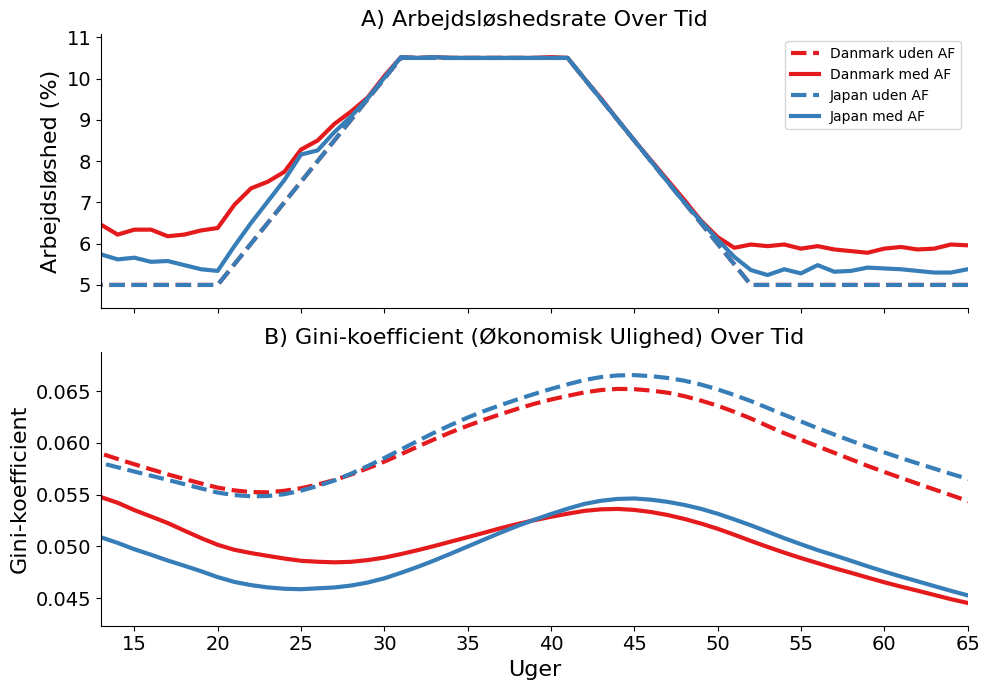

In [10]:
# Sørg for, at farver er defineret
colors = plt.get_cmap('Set1')

# Uddrag uger fra dataindeks
weeks = unemployment_rate_denmark_ui_avg.index + 1  # Juster, hvis tidsintervaller starter fra 0

x_limits = (13, 65)

# Opret masker til at vælge data inden for de specificerede x-grænser
mask = (weeks >= x_limits[0]) & (weeks <= x_limits[1])

# Find minimum og maksimum Gini-værdier inden for x-grænserne
gini_min = min(
    gini_denmark_no_ui_avg[mask].min(),
    gini_denmark_ui_avg[mask].min(),
    gini_japan_no_ui_avg[mask].min(),
    gini_japan_ui_avg[mask].min()
)
gini_max = max(
    gini_denmark_no_ui_avg[mask].max(),
    gini_denmark_ui_avg[mask].max(),
    gini_japan_no_ui_avg[mask].max(),
    gini_japan_ui_avg[mask].max()
)

# Tilføj en lille margen for bedre visualisering
y_margin_gini = (gini_max - gini_min) * 0.1
gini_y_limits = (gini_min - y_margin_gini, gini_max + y_margin_gini)

# Find minimum og maksimum arbejdsløshedsrater inden for x-grænserne
ur_min = min(
    unemployment_rate_denmark_no_ui_avg[mask].min(),
    unemployment_rate_denmark_ui_avg[mask].min(),
    unemployment_rate_japan_no_ui_avg[mask].min(),
    unemployment_rate_japan_ui_avg[mask].min()
)
ur_max = max(
    unemployment_rate_denmark_no_ui_avg[mask].max(),
    unemployment_rate_denmark_ui_avg[mask].max(),
    unemployment_rate_japan_no_ui_avg[mask].max(),
    unemployment_rate_japan_ui_avg[mask].max()
)

# Tilføj en lille margen for bedre visualisering
y_margin_ur = (ur_max - ur_min) * 0.1
ur_y_limits = (ur_min - y_margin_ur, ur_max + y_margin_ur)

# Plotning
plt.figure(figsize=(10, 7))

# Første subplot: Arbejdsløshedsrater
ax1 = plt.subplot(2, 1, 1)
ax1.plot(weeks, unemployment_rate_denmark_no_ui_avg.values, label='Danmark uden AF', color=colors(0), linewidth=3, linestyle='--')
ax1.plot(weeks, unemployment_rate_denmark_ui_avg.values, label='Danmark med AF', color=colors(0), linewidth=3)
ax1.plot(weeks, unemployment_rate_japan_no_ui_avg.values, label='Japan uden AF', color=colors(1), linewidth=3, linestyle='--')
ax1.plot(weeks, unemployment_rate_japan_ui_avg.values, label='Japan med AF', color=colors(1), linewidth=3)
ax1.set_ylabel('Arbejdsløshed (%)', fontsize=16)

# Indstil akse-ticks og grænser
x_ticks = [1] + list(range(5, parameters_common['steps'] + 1, 5))
ax1.set_xticks(x_ticks)
ax1.set_xticklabels([''] * len(x_ticks))  # Fjern x-aksemærkater for det første subplot
ax1.set_xlim(x_limits)
ax1.set_ylim(ur_y_limits)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_title('A) Arbejdsløshedsrate Over Tid', fontsize=16)
ax1.legend(fontsize=10)

# Fjern øverste og højre kanter
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Andet subplot: Gini-koefficienter
ax2 = plt.subplot(2, 1, 2)
ax2.plot(weeks, gini_denmark_no_ui_avg.values, label='Danmark uden AF', color=colors(0), linewidth=3, linestyle='--')
ax2.plot(weeks, gini_denmark_ui_avg.values, label='Danmark med AF', color=colors(0), linewidth=3)
ax2.plot(weeks, gini_japan_no_ui_avg.values, label='Japan uden AF', color=colors(1), linewidth=3, linestyle='--')
ax2.plot(weeks, gini_japan_ui_avg.values, label='Japan med AF', color=colors(1), linewidth=3)
ax2.set_xlabel('Uger', fontsize=16)
ax2.set_ylabel('Gini-koefficient', fontsize=16)

# Indstil akse-ticks og grænser
ax2.set_xticks(x_ticks)
ax2.set_xlim(x_limits)
ax2.set_ylim(gini_y_limits)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_title('B) Gini-koefficient (Økonomisk Ulighed) Over Tid', fontsize=16)

# Fjern øverste og højre kanter
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Juster layout
plt.tight_layout()

# Sørg for, at outputmappen eksisterer
output_folder = "output"  # Sørg for, at denne mappe eksisterer, eller angiv en sti
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Gem plottet
plot_path_pdf = os.path.join(output_folder, "denmark_japan_separation_rate_comparison.pdf")
plt.savefig(plot_path_pdf)

# Vis plottet
plt.show()

In [11]:
from tqdm import tqdm

# Definer et interval af opsigelsesrater til simulering
separation_rate_range = np.linspace(0, 0.05, 50)  # Eksempelinterval: 0.01 til 0.05

# Initialiser ordbøger til at gemme resultater for henholdsvis UI og Non-UI tilfælde
results_ui = {}
results_non_ui = {}

# Initialiser en fremdriftsbjælke
with tqdm(total=len(separation_rate_range) * 2, desc="Simulerer Modeller") as pbar:
    # Kør modellen for hver opsigelsesrate og for både UI og Non-UI tilfælde
    for sep_rate in separation_rate_range:
        for ui_status, model_class in zip(['UI', 'Non-UI'], [LaborMarketModelUI, LaborMarketModel]):
            pbar.set_postfix({'sep_rate': sep_rate, 'UI': ui_status})
            
            # Kopier fælles parametre og opdater opsigelsesrate og frø
            parameters = parameters_common.copy()
            parameters['separation_rate'] = sep_rate
            parameters['seed'] = ap.Values(*seeds)  # Brug varierede frø til gennemsnitlig beregning

            # Opret en stikprøve med de specificerede frø
            parameters_sample = ap.Sample(parameters)

            # Kør eksperimentet
            exp = ap.Experiment(
                model_class,
                parameters_sample,
                iterations=1,    # En iteration pr. parameterkombination
                record=True,
                randomize=False  # Brug specificerede frø uden yderligere randomisering
            )
            exp_results = exp.run()

            # Behandl resultater
            variables = exp_results.arrange_variables()

            # Beregn gennemsnit over kørsler
            avg_variables = variables.groupby('t').mean()
            unemployment_rate_avg = avg_variables['unemployment_rate']

            # Gem arbejdsløshedsrater for hver opsigelsesrate
            if ui_status == 'UI':
                results_ui[sep_rate] = unemployment_rate_avg.values
            else:
                results_non_ui[sep_rate] = unemployment_rate_avg.values

            # Opdater fremdriftsbjælken
            pbar.update(1)

print("Alle iterationer er afsluttet.")

Simulerer Modeller:   0%|          | 0/100 [00:00<?, ?it/s, sep_rate=0, UI=UI]

Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:   1%|          | 1/100 [00:02<04:05,  2.48s/it, sep_rate=0, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.473926
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:   2%|▏         | 2/100 [00:04<03:35,  2.20s/it, sep_rate=0.00102, UI=UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.000577
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:   3%|▎         | 3/100 [00:06<03:27,  2.14s/it, sep_rate=0.00102, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.051832
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:   4%|▍         | 4/100 [00:08<03:19,  2.07s/it, sep_rate=0.00204, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:01.975247
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:   5%|▌         | 5/100 [00:11<03:58,  2.51s/it, sep_rate=0.00204, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.280628
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:   6%|▌         | 6/100 [00:14<04:12,  2.68s/it, sep_rate=0.00306, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.008759
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:   7%|▋         | 7/100 [00:18<04:26,  2.87s/it, sep_rate=0.00306, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.237537
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:   8%|▊         | 8/100 [00:20<04:24,  2.87s/it, sep_rate=0.00408, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.874433
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:   9%|▉         | 9/100 [00:24<04:49,  3.18s/it, sep_rate=0.00408, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.857917
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  10%|█         | 10/100 [00:27<04:42,  3.14s/it, sep_rate=0.0051, UI=UI]     

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.028756
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  11%|█         | 11/100 [00:31<04:59,  3.36s/it, sep_rate=0.0051, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.873509
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  12%|█▏        | 12/100 [00:34<04:46,  3.25s/it, sep_rate=0.00612, UI=UI]   

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.991588
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  13%|█▎        | 13/100 [00:38<05:01,  3.46s/it, sep_rate=0.00612, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.937102
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  14%|█▍        | 14/100 [00:41<04:43,  3.30s/it, sep_rate=0.00714, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.915536
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  15%|█▌        | 15/100 [00:46<05:16,  3.73s/it, sep_rate=0.00714, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:04.714460
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  16%|█▌        | 16/100 [00:49<05:06,  3.65s/it, sep_rate=0.00816, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.464849
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  17%|█▋        | 17/100 [00:54<05:34,  4.03s/it, sep_rate=0.00816, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:04.895007
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  18%|█▊        | 18/100 [00:57<05:06,  3.74s/it, sep_rate=0.00918, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.068640
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:01

Simulerer Modeller:  19%|█▉        | 19/100 [01:02<05:37,  4.17s/it, sep_rate=0.00918, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:05.178747
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  20%|██        | 20/100 [01:06<05:10,  3.89s/it, sep_rate=0.0102, UI=UI]     

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.210780
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:01

Simulerer Modeller:  21%|██        | 21/100 [01:11<05:52,  4.46s/it, sep_rate=0.0102, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:05.807537
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  22%|██▏       | 22/100 [01:15<05:14,  4.04s/it, sep_rate=0.0112, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.033429
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:01

Simulerer Modeller:  23%|██▎       | 23/100 [01:22<06:21,  4.95s/it, sep_rate=0.0112, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:07.088842
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  24%|██▍       | 24/100 [01:25<05:34,  4.40s/it, sep_rate=0.0122, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.109555
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:01

Simulerer Modeller:  25%|██▌       | 25/100 [01:33<07:01,  5.62s/it, sep_rate=0.0122, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:08.452164
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  26%|██▌       | 26/100 [01:36<06:00,  4.88s/it, sep_rate=0.0133, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.135900
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:01

Simulerer Modeller:  27%|██▋       | 27/100 [01:46<07:50,  6.45s/it, sep_rate=0.0133, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:10.117370
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  28%|██▊       | 28/100 [01:50<06:36,  5.50s/it, sep_rate=0.0143, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.289283
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:02

Simulerer Modeller:  29%|██▉       | 29/100 [02:02<09:04,  7.67s/it, sep_rate=0.0143, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:12.726364
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  30%|███       | 30/100 [02:06<07:29,  6.42s/it, sep_rate=0.0153, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.484665
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:02

Simulerer Modeller:  31%|███       | 31/100 [02:21<10:19,  8.98s/it, sep_rate=0.0153, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:14.970194
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  32%|███▏      | 32/100 [02:24<08:13,  7.25s/it, sep_rate=0.0163, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.207866
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:03

Simulerer Modeller:  33%|███▎      | 33/100 [02:42<11:42, 10.49s/it, sep_rate=0.0163, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:18.033202
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  34%|███▍      | 34/100 [02:45<09:06,  8.28s/it, sep_rate=0.0173, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.107163
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:04

Simulerer Modeller:  35%|███▌      | 35/100 [03:05<12:48, 11.82s/it, sep_rate=0.0173, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:20.099354
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  36%|███▌      | 36/100 [03:08<09:47,  9.18s/it, sep_rate=0.0184, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.997219
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:04

Simulerer Modeller:  37%|███▋      | 37/100 [03:33<14:29, 13.80s/it, sep_rate=0.0184, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:24.581381
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  38%|███▊      | 38/100 [03:36<11:03, 10.70s/it, sep_rate=0.0194, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.453796
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:05

Simulerer Modeller:  39%|███▉      | 39/100 [04:04<16:03, 15.80s/it, sep_rate=0.0194, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:27.693538
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  40%|████      | 40/100 [04:07<12:00, 12.01s/it, sep_rate=0.0204, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.169243
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:06

Simulerer Modeller:  41%|████      | 41/100 [04:37<17:03, 17.35s/it, sep_rate=0.0204, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:29.789523
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  42%|████▏     | 42/100 [04:40<12:37, 13.06s/it, sep_rate=0.0214, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.040649
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:06

Simulerer Modeller:  43%|████▎     | 43/100 [05:14<18:16, 19.23s/it, sep_rate=0.0214, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:33.644854
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  44%|████▍     | 44/100 [05:17<13:27, 14.42s/it, sep_rate=0.0224, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.186809
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:07

Simulerer Modeller:  45%|████▌     | 45/100 [05:55<19:37, 21.42s/it, sep_rate=0.0224, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:37.738522
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  46%|████▌     | 46/100 [05:58<14:22, 15.97s/it, sep_rate=0.0235, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.247556
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:08

Simulerer Modeller:  47%|████▋     | 47/100 [06:40<21:03, 23.84s/it, sep_rate=0.0235, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:42.215408
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  48%|████▊     | 48/100 [06:43<15:17, 17.64s/it, sep_rate=0.0245, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.167050
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:09

Simulerer Modeller:  49%|████▉     | 49/100 [07:29<22:09, 26.08s/it, sep_rate=0.0245, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:45.746057
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  50%|█████     | 50/100 [07:32<15:59, 19.20s/it, sep_rate=0.0255, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.139089
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:10

Simulerer Modeller:  51%|█████     | 51/100 [08:23<23:21, 28.60s/it, sep_rate=0.0255, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:50.543324
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  52%|█████▏    | 52/100 [08:26<16:46, 20.96s/it, sep_rate=0.0265, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.124740
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:10

Simulerer Modeller:  53%|█████▎    | 53/100 [09:20<24:15, 30.96s/it, sep_rate=0.0265, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:54.285268
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  54%|█████▍    | 54/100 [09:23<17:20, 22.62s/it, sep_rate=0.0276, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.164286
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:11

Simulerer Modeller:  55%|█████▌    | 55/100 [10:20<24:38, 32.86s/it, sep_rate=0.0276, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:56.735864
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  56%|█████▌    | 56/100 [10:23<17:32, 23.92s/it, sep_rate=0.0286, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.056711
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:12

Simulerer Modeller:  57%|█████▋    | 57/100 [11:27<25:38, 35.78s/it, sep_rate=0.0286, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:01:03.433449
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  58%|█████▊    | 58/100 [11:30<18:13, 26.03s/it, sep_rate=0.0296, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.289437
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:14

Simulerer Modeller:  59%|█████▉    | 59/100 [12:41<27:00, 39.53s/it, sep_rate=0.0296, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:01:11.008498
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  60%|██████    | 60/100 [12:44<19:03, 28.59s/it, sep_rate=0.0306, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.078597
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:14

Simulerer Modeller:  61%|██████    | 61/100 [13:59<27:35, 42.46s/it, sep_rate=0.0306, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:01:14.805772
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  62%|██████▏   | 62/100 [14:02<19:25, 30.68s/it, sep_rate=0.0316, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.182768
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:16

Simulerer Modeller:  63%|██████▎   | 63/100 [15:23<28:08, 45.65s/it, sep_rate=0.0316, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:01:20.570306
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  64%|██████▍   | 64/100 [15:26<19:44, 32.89s/it, sep_rate=0.0327, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.122294
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:17

Simulerer Modeller:  65%|██████▌   | 65/100 [16:51<28:19, 48.57s/it, sep_rate=0.0327, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:01:25.144574
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  66%|██████▌   | 66/100 [16:54<19:47, 34.93s/it, sep_rate=0.0337, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.088621
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:18

Simulerer Modeller:  67%|██████▋   | 67/100 [18:23<28:11, 51.27s/it, sep_rate=0.0337, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:01:29.387850
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  68%|██████▊   | 68/100 [18:27<19:38, 36.83s/it, sep_rate=0.0347, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.142639
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:19

Simulerer Modeller:  69%|██████▉   | 69/100 [20:03<28:20, 54.86s/it, sep_rate=0.0347, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:01:36.930782
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  70%|███████   | 70/100 [20:07<19:42, 39.43s/it, sep_rate=0.0357, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.401243
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:19

Simulerer Modeller:  71%|███████   | 71/100 [21:45<27:31, 56.96s/it, sep_rate=0.0357, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:01:37.885554
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  72%|███████▏  | 72/100 [21:48<19:04, 40.88s/it, sep_rate=0.0367, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.331385
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:21

Simulerer Modeller:  73%|███████▎  | 73/100 [23:37<27:35, 61.33s/it, sep_rate=0.0367, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:01:49.038102
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  74%|███████▍  | 74/100 [23:40<18:58, 43.81s/it, sep_rate=0.0378, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.917473
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:22

Simulerer Modeller:  75%|███████▌  | 75/100 [25:33<26:51, 64.48s/it, sep_rate=0.0378, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:01:52.711606
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  76%|███████▌  | 76/100 [25:36<18:23, 45.98s/it, sep_rate=0.0388, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.818160
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:23

Simulerer Modeller:  77%|███████▋  | 77/100 [27:33<25:50, 67.42s/it, sep_rate=0.0388, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:01:57.437852
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  78%|███████▊  | 78/100 [27:36<17:36, 48.03s/it, sep_rate=0.0398, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.765681
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:24

Simulerer Modeller:  79%|███████▉  | 79/100 [29:39<24:41, 70.54s/it, sep_rate=0.0398, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:02:03.073474
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  80%|████████  | 80/100 [29:42<16:44, 50.24s/it, sep_rate=0.0408, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.853337
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:25

Simulerer Modeller:  81%|████████  | 81/100 [31:51<23:24, 73.90s/it, sep_rate=0.0408, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:02:09.125197
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  82%|████████▏ | 82/100 [31:54<15:47, 52.65s/it, sep_rate=0.0418, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.054717
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:26

Simulerer Modeller:  83%|████████▎ | 83/100 [34:06<21:41, 76.59s/it, sep_rate=0.0418, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:02:12.435057
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  84%|████████▍ | 84/100 [34:10<14:33, 54.62s/it, sep_rate=0.0429, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.365351
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:28

Simulerer Modeller:  85%|████████▌ | 85/100 [36:32<20:13, 80.88s/it, sep_rate=0.0429, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:02:22.154106
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  86%|████████▌ | 86/100 [36:35<13:26, 57.61s/it, sep_rate=0.0439, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.293996
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:28

Simulerer Modeller:  87%|████████▋ | 87/100 [38:59<18:04, 83.39s/it, sep_rate=0.0439, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:02:23.556346
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  88%|████████▊ | 88/100 [39:02<11:50, 59.22s/it, sep_rate=0.0449, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:02.791977
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:31

Simulerer Modeller:  89%|████████▉ | 89/100 [41:38<16:12, 88.43s/it, sep_rate=0.0449, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:02:36.583408
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  90%|█████████ | 90/100 [41:41<10:28, 62.84s/it, sep_rate=0.0459, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.132140
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:31

Simulerer Modeller:  91%|█████████ | 91/100 [44:19<13:42, 91.44s/it, sep_rate=0.0459, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:02:38.163833
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  92%|█████████▏| 92/100 [44:23<08:39, 64.93s/it, sep_rate=0.0469, UI=UI]    

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.065012
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:32

Simulerer Modeller:  93%|█████████▎| 93/100 [47:06<11:00, 94.35s/it, sep_rate=0.0469, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:02:42.997236
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  94%|█████████▍| 94/100 [47:09<06:42, 67.00s/it, sep_rate=0.048, UI=UI]     

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.183022
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:35

Simulerer Modeller:  95%|█████████▌| 95/100 [50:07<08:21, 100.25s/it, sep_rate=0.048, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:02:57.816804
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  96%|█████████▌| 96/100 [50:10<04:44, 71.13s/it, sep_rate=0.049, UI=UI]     

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.168201
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:35

Simulerer Modeller:  97%|█████████▋| 97/100 [53:08<05:09, 103.22s/it, sep_rate=0.049, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:02:58.089731
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller:  98%|█████████▊| 98/100 [53:11<02:26, 73.27s/it, sep_rate=0.05, UI=UI]      

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.375675
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:37

Simulerer Modeller:  99%|█████████▉| 99/100 [56:17<01:47, 107.17s/it, sep_rate=0.05, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:03:06.263740
Scheduled runs: 5
Completed: 4, estimated time remaining: 0:00:00

Simulerer Modeller: 100%|██████████| 100/100 [56:21<00:00, 33.81s/it, sep_rate=0.05, UI=Non-UI]

Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.395586
Alle iterationer er afsluttet.


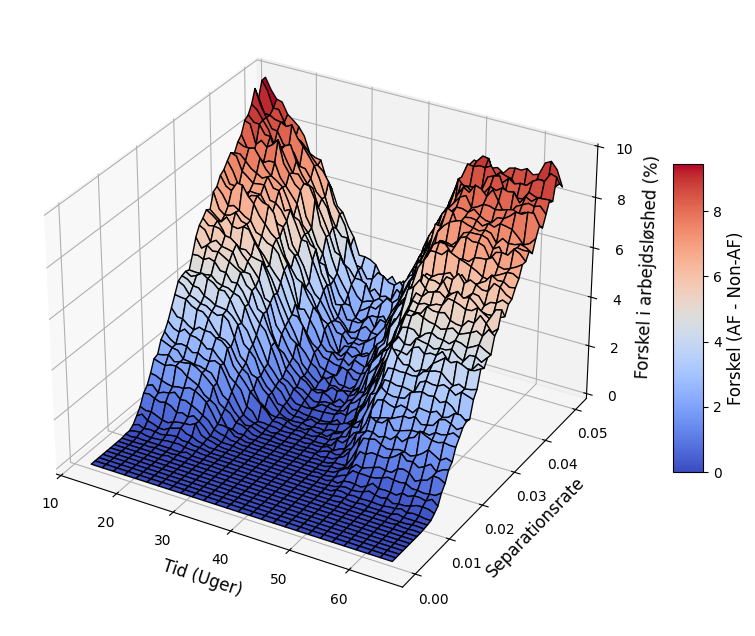

Plottet er gemt som output\arbejdsloshedsrate_forskel_AF_vs_Non_AF.pdf


In [12]:
import os

# Beregn forskellen mellem AF og Non-AF tilfælde
results_diff = {sep_rate: results_ui[sep_rate] - results_non_ui[sep_rate] for sep_rate in separation_rate_range}

# Forbered data til 3D-plot
time_steps = np.arange(parameters_common['steps'])  # Definer tid
separation_rates = np.array(list(results_diff.keys()))  # Opsigelsesrater som en numpy-array
unemployment_rate_diff = np.array(list(results_diff.values()))  # Forskellen i arbejdsløshedsrate

# Definer den periode, der skal vises (f.eks. uger 13 til 65)
mask_start, mask_end = 13, 65
mask = (time_steps >= mask_start) & (time_steps <= mask_end)

# Anvend masken til at filtrere dataene
masked_time_steps = time_steps[mask]  # Filtrer tidene
masked_unemployment_rate_diff = unemployment_rate_diff[:, mask]  # Filtrer arbejdsløshedsforskellen
T_masked, S_masked = np.meshgrid(masked_time_steps, separation_rates)  # Skab et mesh til plottet

# Opret et 3D-plot for forskellen
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Tegn overfladen for det filtrerede interval
diff_surface = ax.plot_surface(T_masked, S_masked, masked_unemployment_rate_diff, cmap='coolwarm', edgecolor='k')

# Tilføj en farvebjælke for forskelsværdierne
colorbar = fig.colorbar(diff_surface, ax=ax, shrink=0.5, aspect=10)
colorbar.set_label('Forskel (AF - Non-AF)', fontsize=12)

# Indstil akseetiketter og titel
ax.set_xlabel('Tid (Uger)', fontsize=12)
ax.set_ylabel('Separationsrate', fontsize=12)
ax.set_zlabel('Forskel i arbejdsløshed (%)', fontsize=12)
#ax.set_title('Forskel i arbejdsløshedsrate (AF - Non-AF)', fontsize=14)

# Tilpas størrelsen på aksemærker
ax.tick_params(axis='both', which='major', labelsize=10)

# Gem plottet
output_folder = "output"  # Sørg for, at denne mappe eksisterer, eller opret den
os.makedirs(output_folder, exist_ok=True)
plot_path = os.path.join(output_folder, "arbejdsloshedsrate_forskel_AF_vs_Non_AF.pdf")
plt.savefig(plot_path, format='pdf', bbox_inches='tight')

# Vis plottet
plt.show()

print(f"Plottet er gemt som {plot_path}")

In [13]:
# Importér nødvendige moduler
import numpy as np
import os
import matplotlib.pyplot as plt
import agentpy as ap
from model import *  # Sørg for, at begge modeller er defineret i model.py


# Fælles parametre
parameters_common = {
    'labor_force': 1000,  # Størrelsen af arbejdsstyrken
    'separation_rate': 0.015,  # Typisk basis-opsigelsesrate for begge lande
    'steps': 70,  # Antal simuleringsuger
    'initial': 0.95,  # Startniveau for beskæftigelse
    'target': 0.895  # Målbeskæftigelsesniveau
}

# Antal kørseler til gennemsnit
num_runs = 5

# Seeds til reproducerbarhed
seeds = list(range(1, num_runs + 1))

# Ansættelsesfaktorer for Danmark og Japan
hiring_factors = {
    'Denmark': 1,  # Fuld responsivitet i ansættelser
    'Japan': 0.9   # Nedsat responsivitet i ansættelser
}

# Initialiser en ordbog til at gemme resultaterne
results = {}

# Gennemløb for hvert land og status for arbejdsløshedsforsikring (AF)
for country, hiring_factor in hiring_factors.items():
    for ui_status in ['With UI', 'Without UI']:
        # Definer specifikke parametre for hvert land og AF-status
        parameters = parameters_common.copy()
        parameters['hiring_factor'] = hiring_factor  # Indstil ansættelsesfaktoren
        parameters['seed'] = ap.Values(*seeds)  # Brug ap.Values til at angive varierede seeds

        # Vælg den relevante modelklasse
        model_class = LaborMarketModelUI if ui_status == 'With UI' else LaborMarketModel

        # Opret en prøve med de angivne seeds
        parameters_sample = ap.Sample(parameters)

        # Kør eksperimentet
        exp = ap.Experiment(
            model_class,
            parameters_sample,
            iterations=1,    # En iteration per parameterkombination
            record=True,
            randomize=False  # Brug angivne seeds uden yderligere tilfældiggørelse
        )
        exp_results = exp.run()

        # Behandl resultaterne
        variables = exp_results.arrange_variables()

        # Beregn gennemsnit over kørseler
        avg_variables = variables.groupby('t').mean()
        unemployment_rate_avg = avg_variables['unemployment_rate']
        gini_avg = avg_variables['gini_coefficient']

        # Gem resultaterne i ordbogen
        key = f"{country}_{ui_status.replace(' ', '_')}"
        results[key] = {
            'unemployment_rate': unemployment_rate_avg,
            'gini_coefficient': gini_avg
        }

Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:14.919477
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.161159
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:14.411764
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.124386


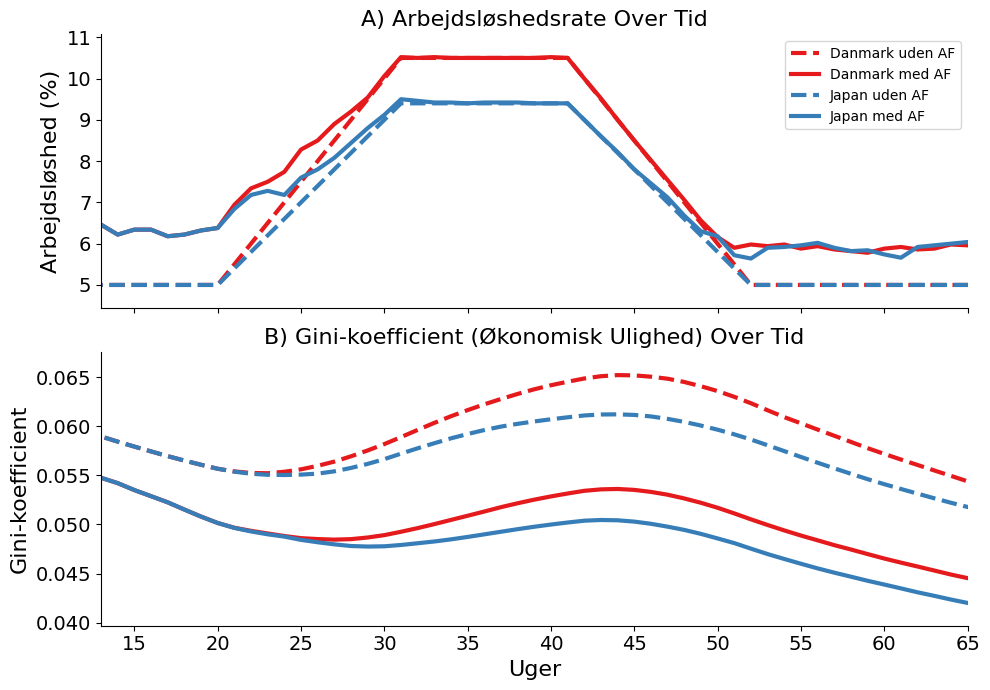

In [14]:
# Uddrag uger fra dataindekset
weeks = results['Denmark_With_UI']['unemployment_rate'].index + 1  # Juster, hvis tidsintervaller starter fra 0

# Definer x-akse grænser for plottet
x_limits = (13, 65)

# Opret masker for at vælge data inden for de angivne x-grænser
mask = (weeks >= x_limits[0]) & (weeks <= x_limits[1])

# Find minimums- og maksimumsværdier for Gini-koefficienten inden for x-grænserne
gini_min = min(
    results['Denmark_Without_UI']['gini_coefficient'][mask].min(),
    results['Denmark_With_UI']['gini_coefficient'][mask].min(),
    results['Japan_Without_UI']['gini_coefficient'][mask].min(),
    results['Japan_With_UI']['gini_coefficient'][mask].min()
)
gini_max = max(
    results['Denmark_Without_UI']['gini_coefficient'][mask].max(),
    results['Denmark_With_UI']['gini_coefficient'][mask].max(),
    results['Japan_Without_UI']['gini_coefficient'][mask].max(),
    results['Japan_With_UI']['gini_coefficient'][mask].max()
)

# Tilføj en lille margen for bedre visualisering
y_margin_gini = (gini_max - gini_min) * 0.1
gini_y_limits = (gini_min - y_margin_gini, gini_max + y_margin_gini)

# Find minimums- og maksimumsværdier for arbejdsløshedsrate inden for x-grænserne
ur_min = min(
    results['Denmark_Without_UI']['unemployment_rate'][mask].min(),
    results['Denmark_With_UI']['unemployment_rate'][mask].min(),
    results['Japan_Without_UI']['unemployment_rate'][mask].min(),
    results['Japan_With_UI']['unemployment_rate'][mask].min()
)
ur_max = max(
    results['Denmark_Without_UI']['unemployment_rate'][mask].max(),
    results['Denmark_With_UI']['unemployment_rate'][mask].max(),
    results['Japan_Without_UI']['unemployment_rate'][mask].max(),
    results['Japan_With_UI']['unemployment_rate'][mask].max()
)

# Tilføj en lille margen for bedre visualisering
y_margin_ur = (ur_max - ur_min) * 0.1
ur_y_limits = (ur_min - y_margin_ur, ur_max + y_margin_ur)

# Sørg for, at farver er defineret
colors = plt.get_cmap('Set1')

# Plotning
plt.figure(figsize=(10, 7))

# Første subplot: Arbejdsløshedsrater
ax1 = plt.subplot(2, 1, 1)
ax1.plot(weeks, results['Denmark_Without_UI']['unemployment_rate'].values, label='Danmark uden AF', color=colors(0), linewidth=3, linestyle='--')
ax1.plot(weeks, results['Denmark_With_UI']['unemployment_rate'].values, label='Danmark med AF', color=colors(0), linewidth=3)
ax1.plot(weeks, results['Japan_Without_UI']['unemployment_rate'].values, label='Japan uden AF', color=colors(1), linewidth=3, linestyle='--')
ax1.plot(weeks, results['Japan_With_UI']['unemployment_rate'].values, label='Japan med AF', color=colors(1), linewidth=3)
ax1.set_ylabel('Arbejdsløshed (%)', fontsize=16)

# Indstil aksemærker og grænser
x_ticks = [1] + list(range(5, parameters_common['steps'] + 1, 5))
ax1.set_xticks(x_ticks)
ax1.set_xticklabels([''] * len(x_ticks))  # Fjern x-akse etiketter for det første subplot
ax1.set_xlim(x_limits)
ax1.set_ylim(ur_y_limits)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_title('A) Arbejdsløshedsrate Over Tid', fontsize=16)
ax1.legend(fontsize=10)

# Fjern de øvre og højre akse-linjer
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Andet subplot: Gini-koefficienter
ax2 = plt.subplot(2, 1, 2)
ax2.plot(weeks, results['Denmark_Without_UI']['gini_coefficient'].values, label='Danmark uden AF', color=colors(0), linewidth=3, linestyle='--')
ax2.plot(weeks, results['Denmark_With_UI']['gini_coefficient'].values, label='Danmark med AF', color=colors(0), linewidth=3)
ax2.plot(weeks, results['Japan_Without_UI']['gini_coefficient'].values, label='Japan uden AF', color=colors(1), linewidth=3, linestyle='--')
ax2.plot(weeks, results['Japan_With_UI']['gini_coefficient'].values, label='Japan med AF', color=colors(1), linewidth=3)
ax2.set_xlabel('Uger', fontsize=16)
ax2.set_ylabel('Gini-koefficient', fontsize=16)

# Indstil aksemærker og grænser
ax2.set_xticks(x_ticks)
ax2.set_xlim(x_limits)
ax2.set_ylim(gini_y_limits)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_title('B) Gini-koefficient (Økonomisk Ulighed) Over Tid', fontsize=16)

# Fjern de øvre og højre akse-linjer
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Tilpas layout
plt.tight_layout()

# Gem plottet
plot_path_pdf = os.path.join(output_folder, "denmark_japan_hiringfactor_comparison.pdf")
plt.savefig(plot_path_pdf)

# Vis plottet
plt.show()

Næste step: Kig på hvordan vacancies arbejder sammen med hiring_factor. Hiring_factor skal kun effekte når E^* ændrer sig, ikke hele tiden.

In [15]:
# Importer nødvendige moduler
import numpy as np
import os
import matplotlib.pyplot as plt
import agentpy as ap
from model import *  # Sørg for, at begge modeller er defineret i model.py

# Fælles parametre
parameters_common = {
    'labor_force': 1000,
    'steps': 70,
    'initial': 0.95,
    'target': 0.895
}

# Antal kørsel for gennemsnit
num_runs = 5

# Frø til reproducerbarhed
seeds = list(range(1, num_runs + 1))

# Separationsrater og ansættelsesfaktorer for Danmark og Japan
country_params = {
    'Denmark': {'separation_rate': 0.015, 'hiring_factor': 1},
    'Japan': {'separation_rate': 0.013, 'hiring_factor': 0.9}
}

# Initialiser en ordbog til lagring af resultater
results = {}

# Iterér over lande og arbejdsløshedsforsikring (AF) status
for country, params in country_params.items():
    for ui_status in ['With UI', 'Without UI']:
        # Definer parametre specifikt for landet og AF-status
        parameters = parameters_common.copy()
        parameters['separation_rate'] = params['separation_rate']
        parameters['hiring_factor'] = params['hiring_factor']
        parameters['seed'] = ap.Values(*seeds)  # Brug ap.Values til at specificere forskellige frø

        # Vælg den relevante modelklasse
        model_class = LaborMarketModelUI if ui_status == 'With UI' else LaborMarketModel

        # Opret en prøve med de specificerede frø
        parameters_sample = ap.Sample(parameters)

        # Kør eksperimentet
        exp = ap.Experiment(
            model_class,
            parameters_sample,
            iterations=1,    # En iteration pr. parameterkombination
            record=True,
            randomize=False  # Brug specificerede frø uden yderligere randomisering
        )
        exp_results = exp.run()

        # Behandl resultater
        variables = exp_results.arrange_variables()

        # Beregn gennemsnit over kørsel
        avg_variables = variables.groupby('t').mean()
        unemployment_rate_avg = avg_variables['unemployment_rate']
        gini_avg = avg_variables['gini_coefficient']

        # Gem resultater i ordbogen
        key = f"{country}_{ui_status.replace(' ', '_')}"
        results[key] = {
            'unemployment_rate': unemployment_rate_avg,
            'gini_coefficient': gini_avg
        }

# Nu har du resultater for:
# 'Denmark_With_UI', 'Denmark_Without_UI', 'Japan_With_UI', 'Japan_Without_UI'

# Uddrag arbejdsløshedsrater og Gini-koefficienter til plotning
unemployment_rate_denmark_ui_avg = results['Denmark_With_UI']['unemployment_rate']
gini_denmark_ui_avg = results['Denmark_With_UI']['gini_coefficient']

unemployment_rate_denmark_no_ui_avg = results['Denmark_Without_UI']['unemployment_rate']
gini_denmark_no_ui_avg = results['Denmark_Without_UI']['gini_coefficient']

unemployment_rate_japan_ui_avg = results['Japan_With_UI']['unemployment_rate']
gini_japan_ui_avg = results['Japan_With_UI']['gini_coefficient']

unemployment_rate_japan_no_ui_avg = results['Japan_Without_UI']['unemployment_rate']
gini_japan_no_ui_avg = results['Japan_Without_UI']['gini_coefficient']

Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:15.996429
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.423003
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:10.488155
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.312727


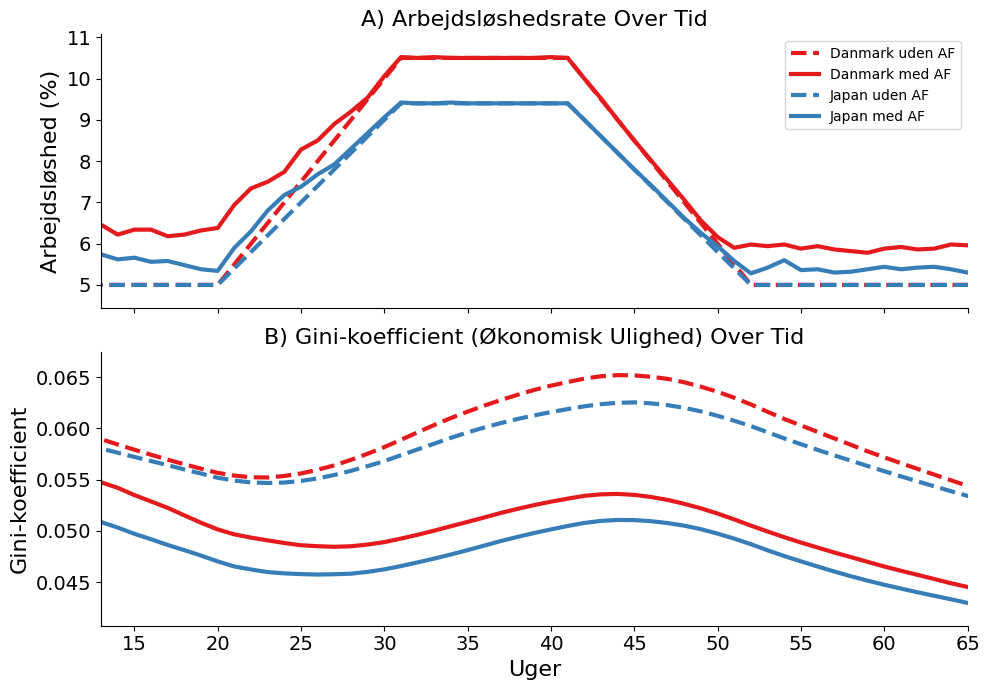

In [16]:
# Sørg for, at farver er defineret
colors = plt.get_cmap('Set1')

# Uddrag uger fra dataindekset
weeks = unemployment_rate_denmark_ui_avg.index + 1  # Justér, hvis tidsintervaller starter fra 0

# Definer x-akse grænser til plottet
x_limits = (13, 65)

# Opret masker for at vælge data inden for de angivne x-grænser
mask = (weeks >= x_limits[0]) & (weeks <= x_limits[1])

# Find minimum og maksimum Gini-værdier inden for x-grænserne
gini_min = min(
    gini_denmark_no_ui_avg[mask].min(),
    gini_denmark_ui_avg[mask].min(),
    gini_japan_no_ui_avg[mask].min(),
    gini_japan_ui_avg[mask].min()
)
gini_max = max(
    gini_denmark_no_ui_avg[mask].max(),
    gini_denmark_ui_avg[mask].max(),
    gini_japan_no_ui_avg[mask].max(),
    gini_japan_ui_avg[mask].max()
)

# Tilføj en lille margen for bedre visualisering
y_margin_gini = (gini_max - gini_min) * 0.1
gini_y_limits = (gini_min - y_margin_gini, gini_max + y_margin_gini)

# Find minimum og maksimum arbejdsløshedsrater inden for x-grænserne
ur_min = min(
    unemployment_rate_denmark_no_ui_avg[mask].min(),
    unemployment_rate_denmark_ui_avg[mask].min(),
    unemployment_rate_japan_no_ui_avg[mask].min(),
    unemployment_rate_japan_ui_avg[mask].min()
)
ur_max = max(
    unemployment_rate_denmark_no_ui_avg[mask].max(),
    unemployment_rate_denmark_ui_avg[mask].max(),
    unemployment_rate_japan_no_ui_avg[mask].max(),
    unemployment_rate_japan_ui_avg[mask].max()
)

# Tilføj en lille margen for bedre visualisering
y_margin_ur = (ur_max - ur_min) * 0.1
ur_y_limits = (ur_min - y_margin_ur, ur_max + y_margin_ur)

# Plotning
plt.figure(figsize=(10, 7))

# Første subplot: Arbejdsløshedsrater
ax1 = plt.subplot(2, 1, 1)
ax1.plot(weeks, unemployment_rate_denmark_no_ui_avg.values, label='Danmark uden AF', color=colors(0), linewidth=3, linestyle='--')
ax1.plot(weeks, unemployment_rate_denmark_ui_avg.values, label='Danmark med AF', color=colors(0), linewidth=3)
ax1.plot(weeks, unemployment_rate_japan_no_ui_avg.values, label='Japan uden AF', color=colors(1), linewidth=3, linestyle='--')
ax1.plot(weeks, unemployment_rate_japan_ui_avg.values, label='Japan med AF', color=colors(1), linewidth=3)
ax1.set_ylabel('Arbejdsløshed (%)', fontsize=16)

# Indstil aksegrænser og mærker
x_ticks = [1] + list(range(5, parameters_common['steps'] + 1, 5))
ax1.set_xticks(x_ticks)
ax1.set_xticklabels([''] * len(x_ticks))  # Fjern x-akse mærker for det første subplot
ax1.set_xlim(x_limits)
ax1.set_ylim(ur_y_limits)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.set_title('A) Arbejdsløshedsrate Over Tid', fontsize=16)
ax1.legend(fontsize=10)

# Fjern øverste og højre aksekanter
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Andet subplot: Gini-koefficienter
ax2 = plt.subplot(2, 1, 2)
ax2.plot(weeks, gini_denmark_no_ui_avg.values, label='Danmark uden AF', color=colors(0), linewidth=3, linestyle='--')
ax2.plot(weeks, gini_denmark_ui_avg.values, label='Danmark med AF', color=colors(0), linewidth=3)
ax2.plot(weeks, gini_japan_no_ui_avg.values, label='Japan uden AF', color=colors(1), linewidth=3, linestyle='--')
ax2.plot(weeks, gini_japan_ui_avg.values, label='Japan med AF', color=colors(1), linewidth=3)
ax2.set_xlabel('Uger', fontsize=16)
ax2.set_ylabel('Gini-koefficient', fontsize=16)

# Indstil aksegrænser og mærker
ax2.set_xticks(x_ticks)
ax2.set_xlim(x_limits)
ax2.set_ylim(gini_y_limits)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.set_title('B) Gini-koefficient (Økonomisk Ulighed) Over Tid', fontsize=16)

# Fjern øverste og højre aksekanter
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Juster layout
plt.tight_layout()

# Sørg for, at outputmappen eksisterer
output_folder = "output"  # Sørg for, at denne mappe eksisterer, eller angiv en sti
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Gem plottet
plot_path_pdf = os.path.join(output_folder, "denmark_japan_seprate_and_hiringrate_comparison_.pdf")
plt.savefig(plot_path_pdf)

# Vis plottet
plt.show()

In [17]:
import os
import matplotlib.pyplot as plt
import agentpy as ap
import numpy as np
from model import LaborMarketModel, LaborMarketModelUI

# Fælles parametre
parameters_common = {
    'labor_force': 1000,   # Arbejdsstyrkens størrelse
    'steps': 70,           # Antal tidsperioder
    'initial': 0.95,       # Indledende beskæftigelse
    'target': 0.895,       # Målniveau for beskæftigelse
    'almp': True           # Aktive arbejdsmarkedspolitikker aktiveret
}

# Antal gentagelser for gennemsnitlig beregning
num_runs = 5

# Frø til reproducerbarhed
seeds = list(range(1, num_runs + 1))

# Lande med specifikke parametre
country_params = {
    'Denmark': {'separation_rate': 0.015, 'hiring_factor': 1},   # Danmark med høj adskillelsesrate og fuld ansættelse
    'Japan': {'separation_rate': 0.013, 'hiring_factor': 0.9}   # Japan med lavere adskillelsesrate og reduceret ansættelse
}

# Indkomstfaktorer for færdigheder til UI-modellen
skill_income_factors = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05]

# Ordbog til at gemme resultater
results = {}

# Kør basismodeller uden arbejdsløshedsforsikring (UI) først
for country, params in country_params.items():
    parameters = parameters_common.copy()
    parameters['separation_rate'] = params['separation_rate']
    parameters['hiring_factor'] = params['hiring_factor']
    parameters['seed'] = ap.Values(*seeds)

    # Kør modellen uden UI
    parameters_sample = ap.Sample(parameters)
    exp = ap.Experiment(
        LaborMarketModel,
        parameters_sample,
        iterations=1,    # Kun én iteration pr. parameterkombination
        record=True,
        randomize=False  # Brug angivne frø uden yderligere tilfældigheder
    )
    exp_results = exp.run()

    variables = exp_results.arrange_variables()
    avg_variables = variables.groupby('t').mean()  # Beregn gennemsnit pr. tidsperiode
    unemployment_rate_avg = avg_variables['unemployment_rate']
    gini_avg = avg_variables['gini_coefficient']

    # Gem resultater for hvert land uden UI
    results[f"{country}_Without_UI"] = {
        'unemployment_rate': unemployment_rate_avg,
        'gini_coefficient': gini_avg
    }

# Kør modeller med UI for hver indkomstfaktor
for skill_income_factor in skill_income_factors:
    for country, params in country_params.items():
        parameters = parameters_common.copy()
        parameters['separation_rate'] = params['separation_rate']
        parameters['hiring_factor'] = params['hiring_factor']
        parameters['skill_income_factor'] = skill_income_factor
        parameters['seed'] = ap.Values(*seeds)

        parameters_sample = ap.Sample(parameters)
        exp = ap.Experiment(
            LaborMarketModelUI,
            parameters_sample,
            iterations=1,
            record=True,
            randomize=False
        )
        exp_results = exp.run()

        variables = exp_results.arrange_variables()
        avg_variables = variables.groupby('t').mean()  # Beregn gennemsnit pr. tidsperiode
        unemployment_rate_avg = avg_variables['unemployment_rate']
        gini_avg = avg_variables['gini_coefficient']

        # Opret en nøgle til resultaterne baseret på indkomstfaktoren
        key = f"{country}_With_UI_skill_{skill_income_factor:.2f}"
        results[key] = {
            'unemployment_rate': unemployment_rate_avg,
            'gini_coefficient': gini_avg
        }

# Gem baseline med UI som reference
# Brug en standardfærdighedsfaktor som baseline
default_skill_factor = 0.03
for country in country_params.keys():
    baseline_key = f"{country}_With_UI_skill_{default_skill_factor:.2f}"
    results[f"{country}_With_UI"] = results[baseline_key]

print("Modelkørsler er fuldført, og resultater er gemt.")

Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.341020
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:03.434773
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:14.538688
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:10.499569
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:14.657292
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:10.582041
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:14.426407
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:10.757188
Scheduled runs: 5
Completed: 5, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:00:14.345969
S

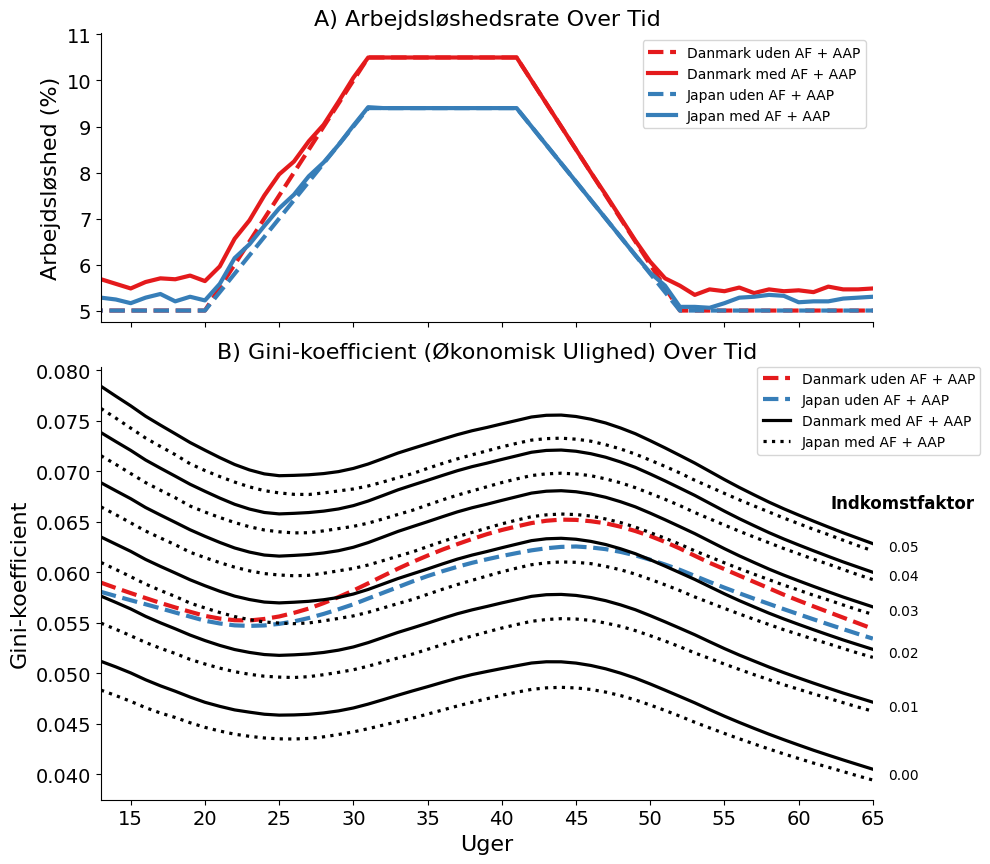

In [18]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Hent arbejdsløshedsdata til baseline-plots
unemployment_rate_denmark_ui = results['Denmark_With_UI']['unemployment_rate']
unemployment_rate_denmark_no_ui = results['Denmark_Without_UI']['unemployment_rate']
unemployment_rate_japan_ui = results['Japan_With_UI']['unemployment_rate']
unemployment_rate_japan_no_ui = results['Japan_Without_UI']['unemployment_rate']

# Definer farver
colors = plt.get_cmap('Set1')

# Opret figur og højdeforhold
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(10, 8.75),
    gridspec_kw={'height_ratios': [2, 3]}  # Bund er nu 1,5 gange toppen
)

##############################
# Øverste plot: Arbejdsløshedsrate
##############################
ax1.plot(weeks, unemployment_rate_denmark_no_ui.values, 
         label='Danmark uden AF + AAP', color=colors(0), linewidth=3, linestyle='--')
ax1.plot(weeks, unemployment_rate_denmark_ui.values, 
         label='Danmark med AF + AAP', color=colors(0), linewidth=3)
ax1.plot(weeks, unemployment_rate_japan_no_ui.values, 
         label='Japan uden AF + AAP', color=colors(1), linewidth=3, linestyle='--')
ax1.plot(weeks, unemployment_rate_japan_ui.values, 
         label='Japan med AF + AAP', color=colors(1), linewidth=3)

ax1.set_ylabel('Arbejdsløshed (%)', fontsize=16)
ax1.set_title('A) Arbejdsløshedsrate Over Tid', fontsize=16)
ax1.legend(fontsize=10)

# Indstil x-aksemærker og grænser
steps = len(unemployment_rate_denmark_no_ui)
x_ticks = [1] + list(range(5, steps+1, 5))
ax1.set_xticks(x_ticks)
ax1.set_xticklabels([''] * len(x_ticks))  # Ingen x-aksemærker i toppen
ax1.set_xlim(x_limits)
ax1.tick_params(axis='both', which='major', labelsize=14)

# Fjern øverste og højre kanter
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Indstil y-aksemærker for arbejdsløshed
ur_min = min(
    unemployment_rate_denmark_no_ui.values[mask].min(),
    unemployment_rate_denmark_ui.values[mask].min(),
    unemployment_rate_japan_no_ui.values[mask].min(),
    unemployment_rate_japan_ui.values[mask].min()
)
ur_max = max(
    unemployment_rate_denmark_no_ui.values[mask].max(),
    unemployment_rate_denmark_ui.values[mask].max(),
    unemployment_rate_japan_no_ui.values[mask].max(),
    unemployment_rate_japan_ui.values[mask].max()
)
ax1.set_ylim(ur_min * 0.95, ur_max * 1.05)

##############################
# Nederste plot: Gini med indkomstfaktorer
##############################

# Baseline-linjer for Non-UI
non_ui_styles = {
    "Denmark": {"color": colors(0), "linestyle": "--"},
    "Japan": {"color": colors(1), "linestyle": "--"}
}

for country, style in non_ui_styles.items():
    gini_without_ui = results[f"{country}_Without_UI"]['gini_coefficient']
    country_label = "Danmark" if country == "Denmark" else country
    ax2.plot(
        weeks[mask],
        gini_without_ui.values[mask],
        label=f"{country_label} uden AF + AAP",
        color=style["color"],
        linestyle=style["linestyle"],
        linewidth=3
    )

# Spor, om UI-linjer er blevet plottet
denmark_ui_plotted = False
japan_ui_plotted = False

for skill_income_factor in skill_income_factors:
    gini_with_ui_denmark = results[f"Denmark_With_UI_skill_{skill_income_factor:.2f}"]['gini_coefficient']
    gini_with_ui_japan = results[f"Japan_With_UI_skill_{skill_income_factor:.2f}"]['gini_coefficient']

    # Danmark
    ax2.plot(
        weeks[mask],
        gini_with_ui_denmark.values[mask],
        label="Danmark med AF + AAP" if not denmark_ui_plotted else None,
        color="black",
        linestyle="solid",
        linewidth=2.3
    )
    # Japan
    ax2.plot(
        weeks[mask],
        gini_with_ui_japan.values[mask],
        label="Japan med AF + AAP" if not japan_ui_plotted else None,
        color="black",
        linestyle="dotted",
        linewidth=2.3
    )

    denmark_ui_plotted = True
    japan_ui_plotted = True

    # Tilføj indkomstfaktormærker og forbindende linjer
    denmark_last_y = gini_with_ui_denmark.values[mask][-1]
    japan_last_y = gini_with_ui_japan.values[mask][-1]
    avg_y_position = (denmark_last_y + japan_last_y) / 2

    ax2.text(
        weeks[mask][-1] + 1,
        avg_y_position,
        f"{skill_income_factor:.2f}",
        fontsize=10,
        verticalalignment="center"
    )

    # Tegn forbindende linjer
    ax2.plot(
        [weeks[mask][-1] + 0.5, weeks[mask][-1] + 1], [denmark_last_y, avg_y_position],
        color="black", linewidth=1
    )
    ax2.plot(
        [weeks[mask][-1] + 0.5, weeks[mask][-1] + 1], [japan_last_y, avg_y_position],
        color="black", linewidth=1
    )

ax2.set_xlabel('Uger', fontsize=16)
ax2.set_ylabel('Gini-koefficient', fontsize=16)
ax2.set_title('B) Gini-koefficient (Økonomisk Ulighed) Over Tid', fontsize=16)

ax2.set_xticks(x_ticks)
ax2.set_xlim(x_limits)
ax2.tick_params(axis='both', which='major', labelsize=14)

# Fjern øverste og højre kanter
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Juster legenden
ax2.legend(fontsize=10, loc='upper left', bbox_to_anchor=(0.85, 1), borderaxespad=0.)

# Tilføj "Indkomstfaktor"-mærke
ax2.text(
    weeks[mask][-4] + 5,
    ax2.get_ylim()[1] - 0.014,
    "Indkomstfaktor",
    fontsize=12,
    fontweight="bold",
    horizontalalignment="center"
)

plt.tight_layout()

# Sørg for, at outputmappen eksisterer
output_folder = "output"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Gem plottet
plot_path_pdf = os.path.join(output_folder, "combined_plot.pdf")
plt.savefig(plot_path_pdf, bbox_inches="tight")

# Vis plottet
plt.show()